In [4]:
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy
from scipy.stats import norm
from tqdm.notebook import tqdm
plt.rcParams['figure.figsize'] = [5, 5]
%config InlineBackend.figure_format='retina'

$$\int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4$$
\
$$p(x) = \frac{2}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \qquad f(x) = \frac{\sqrt{2\pi\sigma^2}}{2} x^3$$

In [5]:
def f(x):
    return ((sigma/2)*(2*np.pi)**0.5)*x**3

def compute_int(N,M):
    result=np.array([])
    sigma_result=np.array([])

    for i in range(M): # number of times I repeat the calculation of the integral, with N fixed

        distG = scipy.stats.norm(0, sigma)
        x_tot = distG.rvs(N,random_state=random_state) # number of samples x_i of the pdf
        xi = np.absolute(x_tot)
        result=np.append(result, np.mean(f(xi)))
    
    return result

In [6]:
random_state = np.random.RandomState(seed=0)
sigma = 1

result = compute_int(100000,1)
print('Result of the integral : ',result)
print('Exact result of the intergal : ',2*sigma**4)

Result of the integral :  [1.99196927]
Exact result of the intergal :  2


In [7]:
# to estimate the error I redo the integral M times:
# the final result of the integral (I) is the mean of the M results 
# and the error (err_I) is the standard error of the mean

M = 10
N = np.rint(np.logspace(2, 6, 100)).astype(int)
I = np.array([])
err_I = np.array([])
for n in N:
    results = compute_int(n,M)
    I = np.append(I,np.mean(results))
    err_I = np.append(err_I,np.std(results)/(M**0.5))


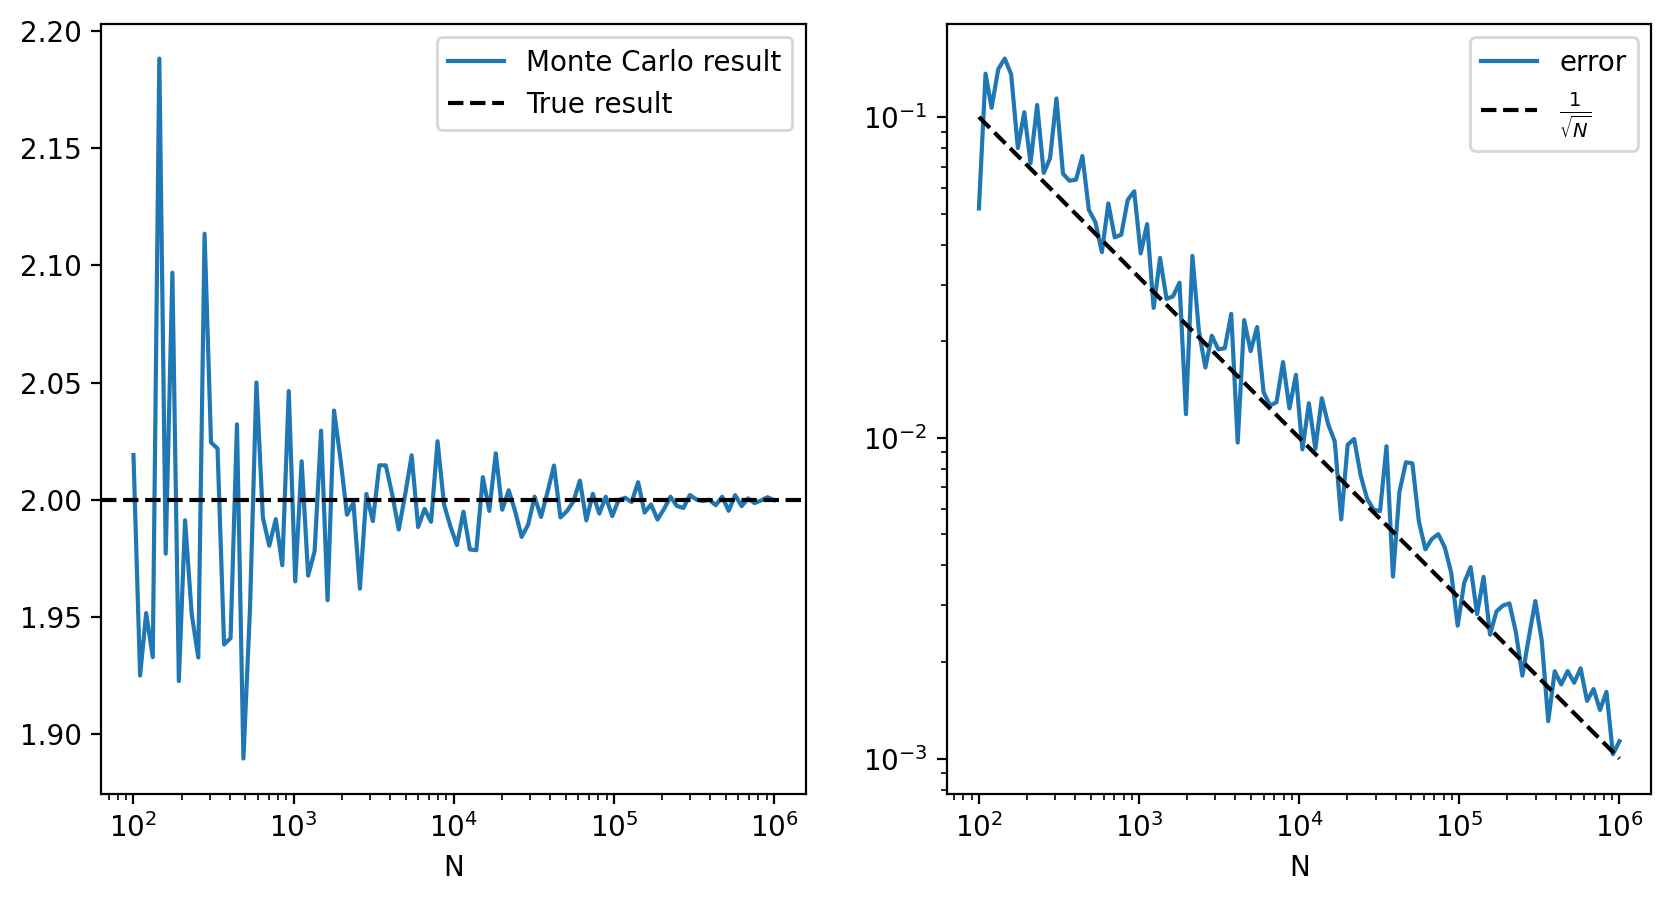

In [8]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(N,I, label='Monte Carlo result')
axs[0].axhline(2*sigma**4, label='True result',ls='--', c='k')
axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_xlabel('N')
axs[1].plot(N, err_I, label='error')
axs[1].plot(N, (N)**(-0.5), ls='--', c='k', label=r'$\frac{1}{\sqrt{N}}$')
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('N')

plt.show()

The error of the result computed with Monte Carlo integration scales with N as:

$$ error \propto \frac{1}{\sqrt{N}} $$ 

This is due to the fact that the result of the Monte Carlo integration is computed as a sample arithmetic mean so its uncertainty must scale as $\frac{1}{\sqrt{N}}$ where N is the number of samples

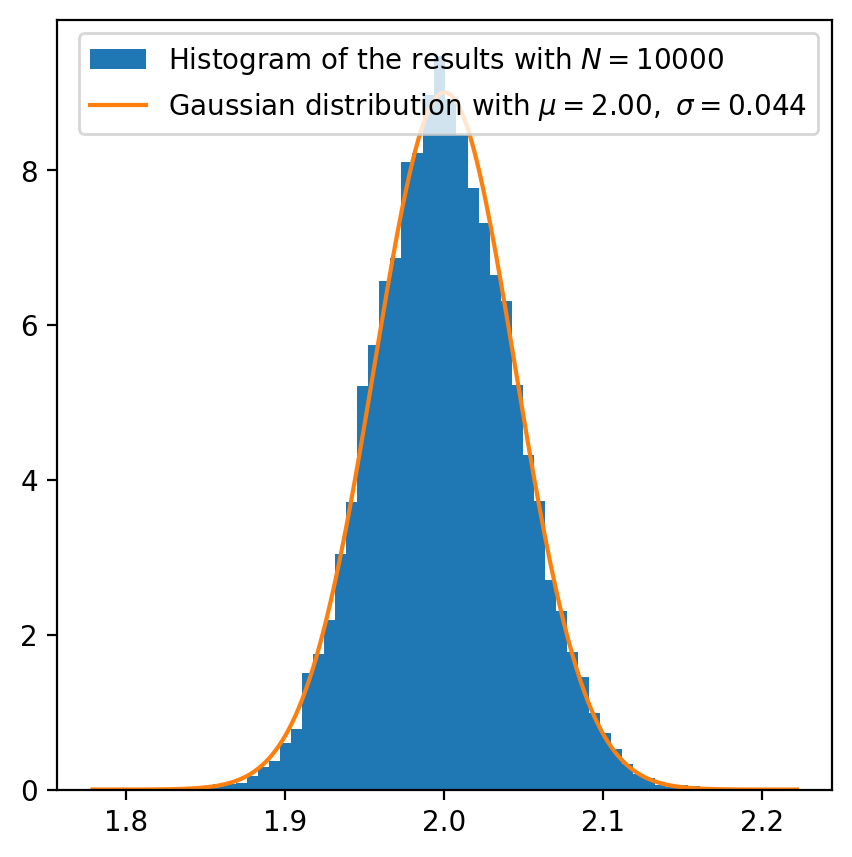

In [9]:
# I fix N and I redo the integral M times
N = 10000
M = 10000

result = compute_int(N,M)

plt.hist(result, density=True, bins=50, label='Histogram of the results with $N=%i$' % N)

sigma_g = np.std(result)
mu_g = np.mean(result)

x_grid = np.linspace(mu_g - 5*sigma_g, mu_g + 5*sigma_g, 1000)

dist = scipy.stats.norm(mu_g, sigma_g)
plt.plot(x_grid, dist.pdf(x_grid), label = 'Gaussian distribution with $\mu=%.2f,\ \sigma=%.3f $' % (mu_g, sigma_g))

plt.legend(loc='upper right')
plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]

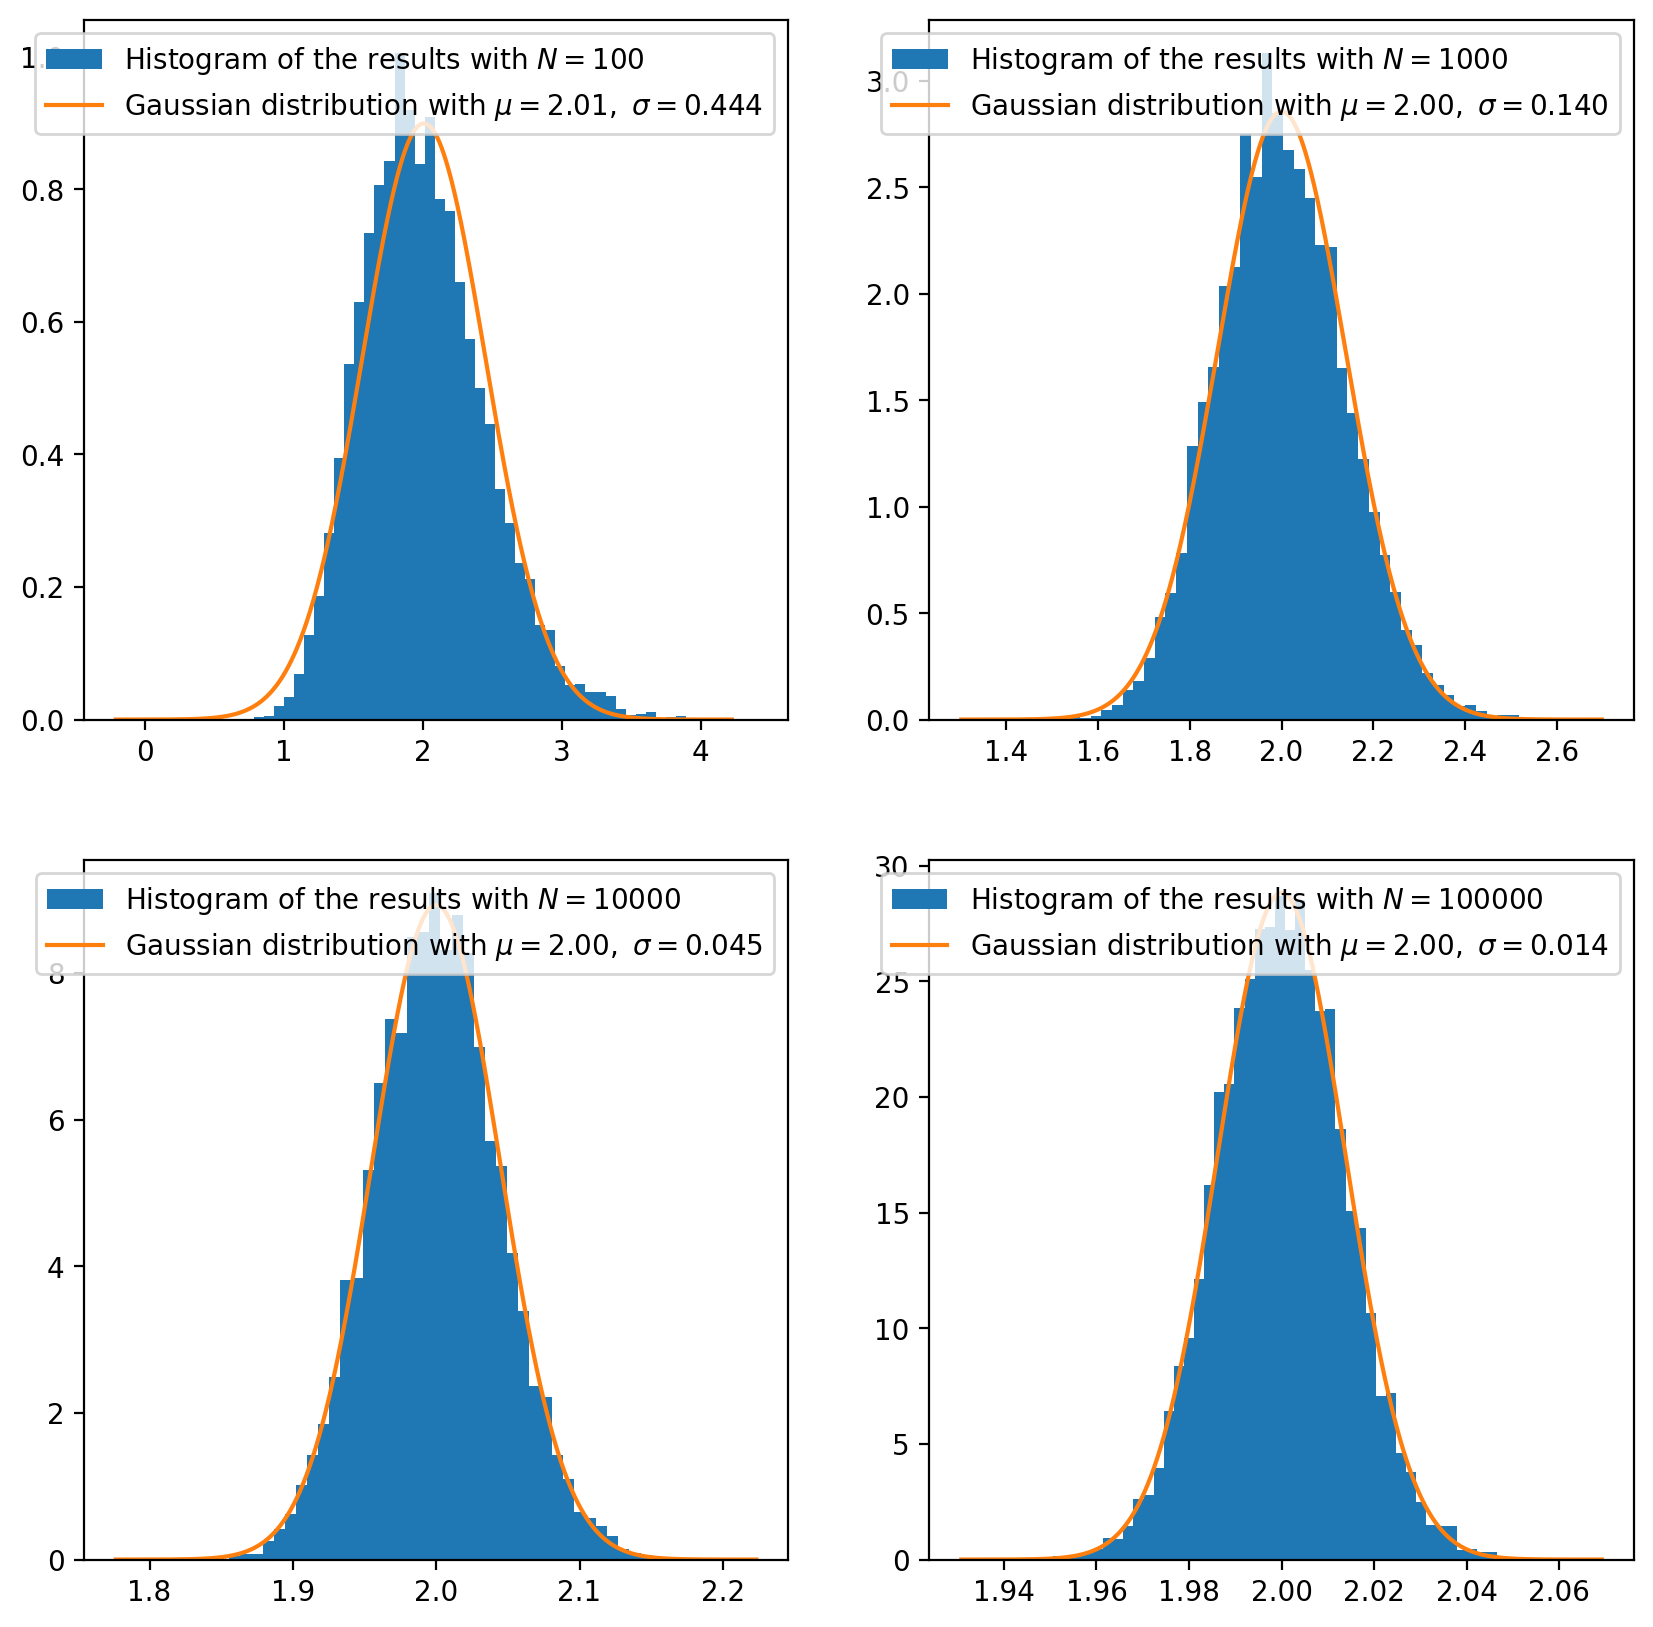

In [10]:
# Now I vary N to see how the distribution changes
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
N = [100, 1000, 10000, 100000]
M = 10000

for n, ax in zip(tqdm(N), [axs[0,0],axs[0,1],axs[1,0],axs[1,1]]):
    results = compute_int(n,M)
    mu_g = np.mean(results)
    sigma_g = np.std(results)
    x = np.linspace(mu_g - 5*sigma_g, mu_g + 5*sigma_g, 1000)
    ax.hist(results, density=True, bins=50, label='Histogram of the results with $N=%i$' % n)
    dist = scipy.stats.norm(mu_g, sigma_g)
    ax.plot(x, dist.pdf(x), label = 'Gaussian distribution with $ \mu=%.2f,\ \sigma=%.3f $' % (mu_g, sigma_g))
    ax.legend(loc='upper right')

By increasing the number of samples N, the histogram of the results becomes more and more peaked around the true result (since $\sigma$ decreases) and it also gets closer to the gaussian distribution